# **my first ML project**

# load data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data Preparation

## **Data Preparation as x and y**

In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x = df.drop('logS', axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## data split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# **Model Building**

## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

LinearRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
print(y_lr_train_pred, y_lr_test_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (TRAIN): ', lr_train_mse)
print('LR R2 (TRAIN): ', lr_train_r2)
print('LR MSE (TEST): ', lr_test_mse)
print('LR R2 (TEST): ', lr_test_r2)

LR MSE (TRAIN):  1.0075362951093687
LR R2 (TRAIN):  0.7645051774663391
LR MSE (TEST):  1.0206953660861033
LR R2 (TEST):  0.7891616188563282


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'TRAINING R2', 'TEST MSE', 'TEST R2']

In [ ]:
lr_results

,Method,Training MSE,TRAINING R2,TEST MSE,TEST R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth = 2, random_state = 100)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print('RF MSE (TRAIN): ', rf_train_mse)
print('RF R2 (TRAIN): ', rf_train_r2)
print('RF MSE (TEST): ', rf_test_mse)
print('RF R2 (TEST): ', rf_test_r2)

RF MSE (TRAIN):  1.028227802112806
RF R2 (TRAIN):  0.7596688824431413
RF MSE (TEST):  1.407688264904896
RF R2 (TEST):  0.7092230211002489


In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'TRAINING R2', 'TEST MSE', 'TEST R2']

In [ ]:
rf_results

,Method,Training MSE,TRAINING R2,TEST MSE,TEST R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop = True)
df_models

,Method,Training MSE,TRAINING R2,TEST MSE,TEST R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visulalization of prediction results**

Text(0.5, 0, 'Experimental LogS')

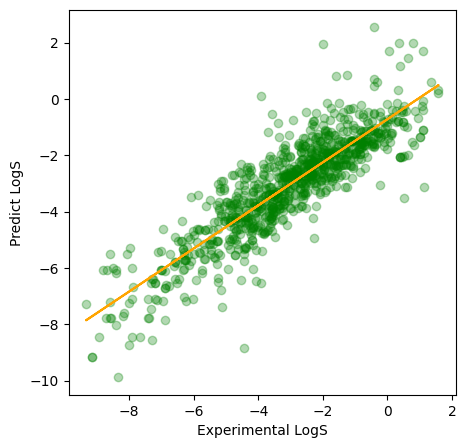

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = y_lr_train_pred, c = 'green', alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'orange')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')